In [1]:
import os
from postProcessing.importDataS import *
from scipy.optimize import curve_fit
SIM_PATH = "/home/cluster_users/x_alben/3-component-micro/simulations/"
os.chdir(SIM_PATH)
#Insert name of the folder
NAME = "Qlambda-vortex-80"
#################
os.chdir(NAME)
data = dataProcessing("./")


SPAN PARAMETER ==> q
q VALUES:
[0.144444   0.18888889 0.23333333 0.27777778 0.32222222 0.36666667
 0.41111111 0.45555556 0.5       ]
RELATIVE FILES
['q=0.144444.h5' 'q=0.18888889.h5' 'q=0.23333333.h5' 'q=0.27777778.h5'
 'q=0.32222222.h5' 'q=0.36666667.h5' 'q=0.41111111.h5' 'q=0.45555556.h5'
 'q=0.5.h5']


In [10]:
s = np.sum(data.p1>32)
sizes = np.zeros(s)
f_density = np.zeros(s)
print(s)
for i in range(len(data.p1)):
    if(data.p1[i]>32):
        data.importSimData(i)
        f_density[i] = data.FreeEnergyDensity
        sizes[i] = data.p1[i]
np.save("f_density_uniform.npy", f_density) 
np.save("size_uniform.npy", sizes)

        
    

6


In [4]:
for i in range(len(data.p1)):
    data.importSimData(i)
    data.open_inputFile()
    D_1_prev =  data.hamiltonian.Emax * np.asarray(data.file['delta_1_prev'][()].view(dtype=data.ourTypeComplex)).reshape(data.Ny, data.Nx)
    data.close_inputFile()

    diff = data.D_1-D_1_prev
    print(np.max(np.absolute(diff)))

4.919111e-07
2.0385605e-05
1.0691985e-05


In [ ]:
system_size = np.array([40,60,70,80,90])
F_uniform   = np.array([-8071.058284442973,-18225.6060601465, -24832.574516993423, -32459.339383361614, -41105.9006179415 ])

F_system80_with_vortex = -32456.81165443774
F_cvortex = F_system80_with_vortex - F_uniform[np.where(system_size==80)[0][0]]
print(F_cvortex)
# print(np.where(system_size==90)[0][0])

In [ ]:
for i in range(len(data.p1)):
    data.importSimData(i)
    idx = np.argmax(data.B)
    y,x = np.unravel_index(idx, data.B.shape)
    plt.figure()
    plt.plot(data.B[y,:])
    plt.ylim([0,np.max(data.B[y,:])])

80
80
80
80
80
80


/home/cluster_users/x_alben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/cluster_users/x_alben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


80
80
80


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

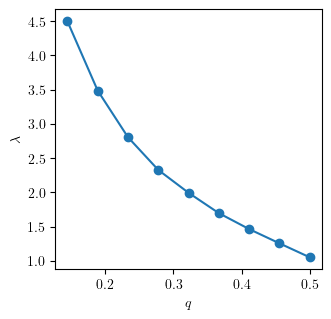

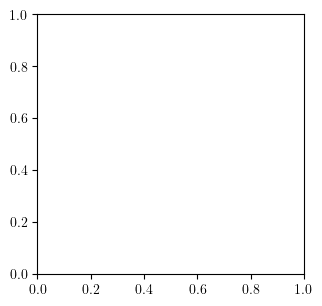

In [3]:
# Q_lambda_vovrtex magnetic lenghtscale calculator
# Load "Q_lambda_vovrtex" and run
lam = []
F_vortex_gap = []
F_vortex_mag = []
for i in range(len(data.p1)):
    data.importSimData(i)
    x_mid = data.Nx//2
    # plt.figure()
    # plt.imshow(data.B, origin='lower',)
    idx = np.argmax(data.B)
    y,x = np.unravel_index(idx, data.B.shape)
    B_xs = data.B[y,x+5:-10]
    B_xs_log = np.log(B_xs)
    print(data.Nx)
    B_xs_log = np.where(B_xs_log<-5, B_xs_log, np.nan)
    B_xs_log = np.where(B_xs_log>-10, B_xs_log, np.nan)
    B_xs_log = B_xs_log[~np.isnan(B_xs_log)]
    # if(i==0):
    #     B_xs = data.B[x_mid,np.argmax(data.B[x_mid,:])+10:-5]
    # if(i==len(data.p1)-1):
    #     B_xs = data.B[x_mid,np.argmax(data.B[x_mid,:])+5:-20]
    # print(data.hamiltonian.q*np.sum(data.B)/(np.pi)/1)
    x = np.arange(0, len(B_xs_log))
   
    

    params = np.polyfit(x, B_xs_log , 1)
    # print(params)
    lam.append(-1/params[0])

    # plt.figure(dpi=100)
    # plt.plot(x, B_xs_log)
    # plt.plot(x, params[0]*x + params[1])
    # F_vortex_gap.append( data.FreeEnergy - F_uniform[ np.where(system_size==data.Nx)[0][0] ] )
    # # print(np.min(data.FreeEnergyDensity[8:-8,8:-8] - data.FreeEnergyDensity[9,9]))
    # F_vortex_mag.append(np.sum(data.B**2)/2)

F_vortex_mag = np.array(F_vortex_mag)
F_vortex_gap = np.array(F_vortex_gap)    

F_vortex = F_vortex_gap + F_vortex_mag

plt.figure(dpi=100)
plt.plot(data.p1, lam, marker='o')
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda$')
# plt.savefig("vortex-lambda-vs-q.pdf", bbox_inches='tight')
plt.figure(dpi=100)
plt.plot(lam, F_vortex, marker='o')
plt.ylabel(r'$F_{\textrm{vortex}}$')
plt.xlabel(r'$\lambda$')
plt.figure(dpi=100)
plt.plot(data.p1, F_vortex, marker='o')
plt.ylabel(r'$F_{\textrm{vortex}}$')
plt.xlabel(r'$q$')
# plt.savefig("vortex-F-vs-lambda.pdf", bbox_inches='tight')
# np.save("vortex-N60-F_gap.npy", F_vortex_gap)
# np.save("vortex-N60-F_mag.npy", F_vortex_mag)
# np.save("vortex-N60-F_tot.npy", F_vortex)
# np.save("vortex-N60-q", data.p1)
# np.save("vortex-N60-lambda", lam)


In [ ]:
qmats= np.array([0.144444, 0.188888, 0.233333, 0.277778, 0.322222, 0.366667,
       0.411111])
Fmats_x = np.array([3.430653060905206,
 3.076344505231026,
 2.8133145459562043,
 2.6031011416921546,
 2.4281622480469713,
 2.278762824762825,
 2.1486708068720355])
Fmats = np.array([[3.31090454, 3.04043155, 2.80319713, 2.60069334, 2.4279758 ,
        2.27915556, 2.14916776],
       [3.40007627, 3.07328803, 2.81388297, 2.60350139, 2.42822964,
        2.27868511, 2.1485539 ],
       [3.41791181, 3.07716588, 2.81463147, 2.60361576, 2.42822974,
        2.27866945, 2.14853854]])

In [ ]:
F_vortex_6 = F_vortex 
F_core_6 = F_vortex_gap 
F_mag_6 = F_vortex_mag 
lam6 = lam
q6 = data.p1

In [ ]:
F_mats = 3*np.array([1.5896338989796264,
 1.2386830837121898,
 1.0618018279416401,
 0.9423734147363194])
q_mats = np.array([0.1, 0.2, 0.3, 0.4])

In [ ]:
plt.figure(dpi=250)
plt.plot(q6, F_vortex_6, marker='o', color='black', label=r"$N=60$")
plt.plot(data.p1, F_vortex, marker='o', color='red',label=r"$N=80$")
# plt.plot(qmats, Fmats[2,:], marker='o', color='blue',label=r"$N=32$")
# plt.plot(qmats, Fmats[0,:], marker='o', color='green',label=r"$N=16$")
# plt.plot(data.p1, 100*np.abs(F_vortex/F_vortex_6-1), marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$q$")
# plt.ylabel(r"$F_{\textrm{tot}}$")
plt.legend(loc='best')

# plt.savefig("vortex-system-size-Ftot-q.pdf", bbox_inches='tight')

# plt.figure()
# plt.plot(q6, lam6, marker='o', color='black',label=r"$N=60$")
# plt.plot(data.p1, lam, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$q$")
# plt.ylabel(r"$\lambda$")
# plt.legend(loc='best')
# # plt.savefig("vortex-system-size-lambda-q.pdf", bbox_inches='tight')

# plt.figure()
# plt.plot(q6, F_core_6, marker='o', color='black',label=r"$N=60$")
# plt.plot(data.p1, F_vortex_gap, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$q$")
# plt.ylabel(r"$F_{\textrm{gaps}}$")
# plt.legend(loc='best')
# # plt.savefig("vortex-system-size-Fgaps-q.pdf", bbox_inches='tight')

# plt.figure()
# plt.plot(q6, F_mag_6, marker='o', color='black',label=r"$N=60$")
# plt.plot(data.p1, F_vortex_mag, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$q$")
# plt.ylabel(r"$F_{\textrm{mag}}$")
# plt.legend(loc='best')
# # plt.savefig("vortex-system-size-Fmag-q.pdf", bbox_inches='tight')

# plt.figure()
# plt.plot(lam6, F_vortex_6, marker='o', color='black', label=r"$N=60$")
# plt.plot(lam, F_vortex, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$\lambda$")
# plt.ylabel(r"$F_{\textrm{tot}}$")
# plt.legend(loc='best')
# # plt.savefig("vortex-system-size-Ftot-lambda.pdf", bbox_inches='tight')


# plt.figure()
# plt.plot(lam6, F_core_6, marker='o', color='black',label=r"$N=60$")
# plt.plot(lam, F_vortex_gap, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$\lambda$")
# plt.ylabel(r"$F_{\textrm{gaps}}$")
# plt.legend(loc='best')
# # plt.savefig("vortex-system-size-Fgaps-lambda.pdf", bbox_inches='tight')

# plt.figure()
# plt.plot(lam6, F_mag_6, marker='o', color='black',label=r"$N=60$")
# plt.plot(lam, F_vortex_mag, marker='o', color='red',label=r"$N=80$")
# plt.xlabel(r"$\lambda$")
# plt.ylabel(r"$F_{\textrm{mag}}$")
# plt.legend(loc='best')
# plt.savefig("vortex-system-size-Fmag-lambda.pdf", bbox_inches='tight')

In [ ]:
# Radius vs lambda plot
# After loading and running the script above load Q_lambda_skyrmion and run this

params = {
   'font.family' : 'STIXGeneral',
   'mathtext.fontset': 'stix',
   'axes.labelsize': 18,
   'legend.fontsize': 16,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': True,
   'figure.figsize': [3.44, 3.0],
   'axes.grid' : False
   }
plt.rcParams.update(params)
plt.close('all')

radius = np.zeros(len(data.p1))
F_cores = np.zeros(len(data.p1))
F_mag = np.zeros(len(data.p1))
F = np.zeros(len(data.p1))


for i in range(len(data.p1) ):
    data.importSimData(i)
    print(data.Nx)
    area_density = 0.5* (1 - 2/np.sqrt(3)*np.sin( data.phaseDiff(data.D_2, data.D_1) ))
    # r2 = 0.5* np.sum(data.phaseDiff(data.D_2, data.D_1)[data.Nx//2, :]<0)
    radius[i] = np.sqrt(np.sum(area_density)/np.pi) 
    F_bulk = data.FreeEnergy - F_uniform[ np.where(system_size==data.Nx)[0][0] ]
    F_magnetic = data.B**2 / 2
    F_cores[i] = F_bulk
    F_mag[i] = np.sum(F_magnetic) 
   

F = F_cores + F_mag
F = F
params2 = np.polyfit(lam, radius, 1)
params3 = np.polyfit(lam, F, 1)
lam = np.array(lam)

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(4*1.2,3.44*2),
                        gridspec_kw=dict( {'top':0.8, 'bottom':0.15,'hspace':0.05, 'wspace':0.05} ) )

axes[0].plot(lam, params2[0]*lam + params2[1], linewidth=0.8,linestyle="--", color="gray")
axes[0].plot(lam, radius, marker='o', color="black", linewidth=0.0)
# axes[0].set_xlabel(r'$\lambda$')
axes[0].set_ylabel(r'$r$')
axes[0].set_xticks([])

axes[1].plot(lam, F, marker='o', color="black", linewidth=0.0)
axes[1].plot(lam, params3[0]*lam + params3[1],linewidth=0.8,linestyle="--", color="gray")
axes[1].set_xlabel(r'$\lambda$')
# axes[1].set_ylabel(r'$F/F_{\textrm{cv}}$')
axes[1].set_ylabel(r'$F$')
# plt.savefig("rF-lambda-60.pdf", bbox_inches='tight')
# np.save("skyrmion-N60-F_gap.npy", F_cores)
# np.save("skyrmion-N60-F_mag.npy", F_mag)
# np.save("skyrmion-N60-F_tot.npy", F)
# np.save("skyrmion-N60-q", data.p1)
# np.save("skyrmion-N60-lambda", lam)


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
F6 = F
F_cores_6 = F_cores
F_mag_6 = F_mag

In [ ]:

plt.plot(lam, radius,label="bigger")
plt.plot(lam,smallerR,label="smaller")
plt.legend(loc="best")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$r$')

In [ ]:
params = {
   'font.family' : 'STIXGeneral',
   'mathtext.fontset': 'stix',
   'axes.labelsize': 18,
   'legend.fontsize': 16,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': True,
   'figure.figsize': [3.44, 3.0],
   'axes.grid' : False
   }

plt.rcParams.update(params)
plt.close('all')

Fv = np.zeros(len(data.p1))

for i in range(len(data.p1)):
    data.importSimData(i)
    Fv[i] = data.FreeEnergy -  F_uniform[ np.where(system_size==data.Nx)[0][0] ]
plt.figure(dpi=200)
plt.plot(data.p1, Fv, linestyle="", marker='o')
plt.xlabel(r"$s$")
plt.ylabel(r"$F_{tot}$")
# np.save("F_signle_comp_vortex", np.average(Fv))
print(np.average(Fv))


In [ ]:
# Paper plot ERS -- Import ERS-diagram folder and plot
#Plotting parameters
params = {
   'font.family' : 'STIXGeneral',
   'mathtext.fontset': 'stix',
   'axes.labelsize': 18,
   'legend.fontsize': 16,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': True,
   'figure.figsize': [3.44, 3.0],
   'axes.grid' : False
   }

plt.rcParams.update(params)
plt.close('all')

n = len(data.p1)
radius = np.zeros(n)
Ftot = np.zeros(n)

size = np.zeros(n)




for i in range(n):
    data.importSimData(i)
    area_density = 0.5* (1 - 2/np.sqrt(3)*np.sin( data.phaseDiff(data.D_2, data.D_1) ))
    radius[i] = np.sqrt(np.sum(area_density)/np.pi) 
    size[i] = data.Nx
    # save total free energy
    F_bulk_density = data.FreeEnergy - F_uniform[ np.where(system_size==data.Nx)[0][0] ]
    F_magnetic = data.B**2 / 2
    # plt.figure()
    # plt.imshow(F_bulk_density)
    # plt.colorbar()
    Ftot[i] = F_bulk_density +  np.sum(F_magnetic)
    # if data.p1[i]>2: Ftot[i] += 0.514649


fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8),
                        gridspec_kw=dict( {'top':0.8, 'bottom':0.15,'hspace':0.05, 'wspace':0.05} ) )

axes[0].plot(data.p1, Ftot, marker="o", color="black", markersize=4, linewidth=0.7)
axes[0].set_xticks([])
# axes[0].set_xlim([0,3])
# axes[1].set_xlim([0,3])
axes[1].plot(data.p1, radius, marker="o",color="black",  markersize=4, linewidth=0.7)
axes[0].set_ylabel(r"$F_\textrm{tot}/F_\textrm{cv} - 5$")
axes[1].set_ylabel(r"$r$")

axes[1].set_xlabel(r"$s$")

# plt.figure(dpi=100)
# plt.plot(F_base)
# plt.xlabel(r"$s$")
# plt.ylabel(r"$F_{bulk}$")

# plt.tight_layout()
# plt.savefig("ERS_new.pdf", bbox_inches='tight')
# plt.figure(dpi=150)
plt.figure()
plt.plot(data.p1, radius/size)
# print(radius/size)
erspath="../../ERS-plots/"
np.save(erspath + "skyrmion_r_Q3.npy", radius)
np.save(erspath + "skyrmion_F_Q3.npy", Ftot)
np.save(erspath + "s_vec.npy_Q3", data.p1)
# np.save(erspath + "r_vs_size_Q5.npy", radius/size)
# np.save(erspath + "n_vec_Q5.npy", data.p1)


In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
vMax = 0.0
vMin = 0.0


n = [0,9,18]
for i in range(len(n)):
    data.importSimData(n[i])
    vMax = max(vMax,np.amax(data.B))
    vMin = min(vMin,np.amin(data.B))

fig, axes = plt.subplots(nrows=1,ncols=len(n),figsize=(len(n)*2.2*1.07,2.2),
                        gridspec_kw=dict( {'top':0.8, 'bottom':0.15,'hspace':0.00, 'wspace':0.02} ) )

for i in range(len(n)):
    data.importSimData(n[i])
    if(i==0):
        cs = axes[i].imshow(data.B[10:-10,10:-10 ], cmap='PuBu_r', vmax=vMax,vmin=vMin)
        print(data.B[10:-10,10:-10 ].shape)
        np.save(f"B_{data.p1[n[i]]}",data.B[10:-10,10:-10 ])
    else:
        cs = axes[i].imshow(data.B, cmap='PuBu_r', vmax=vMax,vmin=vMin)
        print(data.B.shape)
        np.save(f"B_s={data.p1[n[i]]}",data.B)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    val = np.round(data.p1[n[i]],2)
    axes[i].text(25, 9, fr'$s={val}$',size=15, bbox={'facecolor': 'white', 'pad': 1, "alpha":0.9, })

ax1_divider = make_axes_locatable(axes[2])
cax1 = ax1_divider.append_axes("right", size="10%", pad="5%")
cb1 = fig.colorbar(cs, cax=cax1, ticks=[vMin, np.round(vMax,2)])




# plt.tight_layout()
plt.savefig(f"ERS-magnetic_field_samples.pdf", bbox_inches='tight')





In [ ]:
radius = np.zeros(len(data.p1))


for i in range(len(data.p1) ):
    data.importSimData(i)
    area_density = 0.5* (1 - 2/np.sqrt(3)*np.sin( data.phaseDiff(data.D_2, data.D_1) ))
    # print(np.sum(area_density))
    # r2 = 0.5* np.sum(data.phaseDiff(data.D_2, data.D_1)[data.Nx//2, :]<0)
    radius[i] = np.sqrt(np.sum(area_density)/np.pi)
     
    # radius[i] = r2
np.save("r_s2", radius)
# np.save("x_axis", data.p1)   
print(radius)
plt.plot(radius)

In [ ]:
n = len(data.p1)
print(n)
Ftot = np.zeros(n)



for i in range(n):
    data.importSimData(i)
    # save total free energy
    Ftot[i] =   data.FreeEnergy - F_uniform[ np.where(system_size==data.Nx)[0][0] ]

Ftot = Ftot/data.Nx
plt.figure(dpi=150)
plt.plot(data.p1, Ftot)
plt.figure(dpi=150)

np.save("dw_energy_density.npy", Ftot)


In [ ]:
# Q_lambda_vovrtex magnetic lenghtscale calculator
# Load "Q_lambda_vovrtex" and run
depth = []
for i in range(len(data.p1)):
    data.importSimData(i)
    D = np.absolute(data.D_1_ig)
    idx = np.argmin(D)
    y,x = np.unravel_index(idx, D.shape)
    D_xs = D[y,:] 
    # plt.figure()
    plt.plot(D_xs)
    # depth.append(np.max(data.B))
    # D_xs_log = 
    
  
    # x = np.arange(0, len(D_xs_log))
   
    

    # params = np.polyfit(x, B_xs_log , 1)
    # print(params)
    # lam.append(-1/params[0])

    # plt.figure(dpi=100)
    # plt.plot(x, D_xs_log)
    # plt.plot(x, params[0]*x + params[1])
    # depth.append( np.sum(data.FreeEnergyDensity[4:-4,4:-4] - data.FreeEnergyDensity[5,5]))
    # plt.figure(dpi=100)
    # plt.imshow(data.FreeEnergyDensity[4:-4,4:-4] - data.FreeEnergyDensity[5,5], origin='lower')
    # F2 = np.sum(data.B**2)/2
    # F_vortex.append(F1 + F2)
# plt.plot(data.p1, depth/depth[0]-1)
# F_vortex = np.array(F_vortex)
# plt.figure(dpi=100)
# plt.plot(data.p1, depth)
# plt.plot(data.p1, lam, marker='o')
# plt.figure(dpi=100)
# plt.plot(lam, F_vortex, marker='o')

In [12]:
# Test in double for a small system 
n = len(data.p1)
Ftot = np.zeros(n)

In [13]:
# size = data.p1.astype(np.int)

for i in range(n):
    data.importSimData(i)
    print(data.p1[i])
    # save total free energy
    # size_idx = np.where(size==data.Nx)[0][0]
    # print(size_idx)
    Ftot[i] =   data.FreeEnergy  
    # Ftot[i] = np.sum(data.B**2)/2
print(Ftot)


40.0
48.0
56.0
64.0
72.0
80.0
[ -8061.73544596 -11634.1205358  -15859.15201306 -20736.81462499
 -26267.19157461 -32459.33349309]


array([40., 48., 56.])

In [5]:
F_uniform = Ftot[3:]
print(data.p1[3:])


[40. 48. 56. 64. 72. 80.]


In [9]:
F_vortex = Ftot[3:]

[2.6849021  2.66021745 2.63264964 2.59972569 2.56385381]
[9.32131531 9.25241706 9.20673533 9.19946395 9.14743366]


Text(0.5, 1.0, 'Energy ratio variation $\\%$')

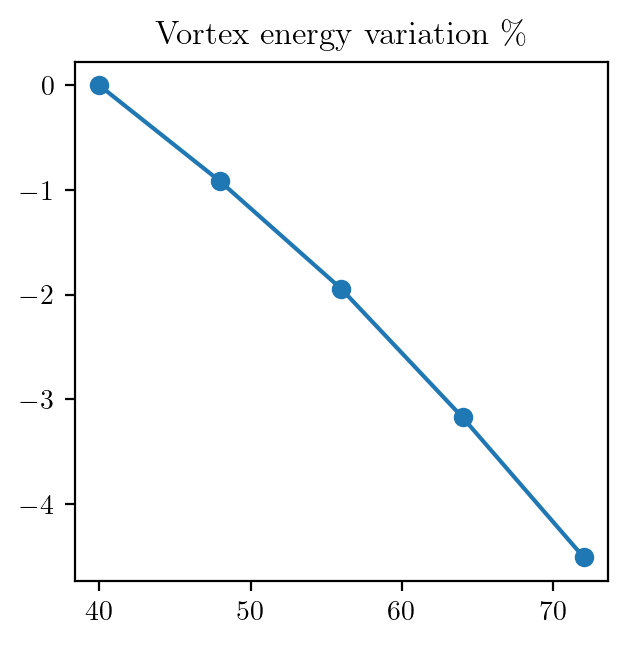

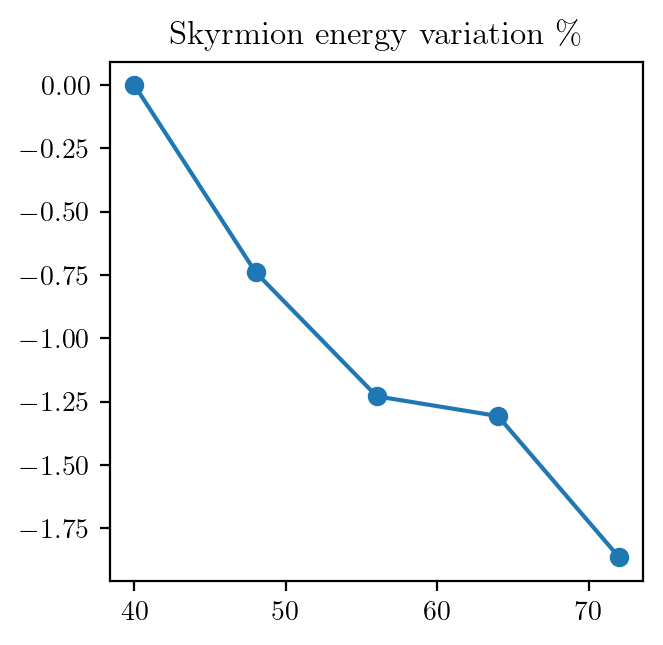

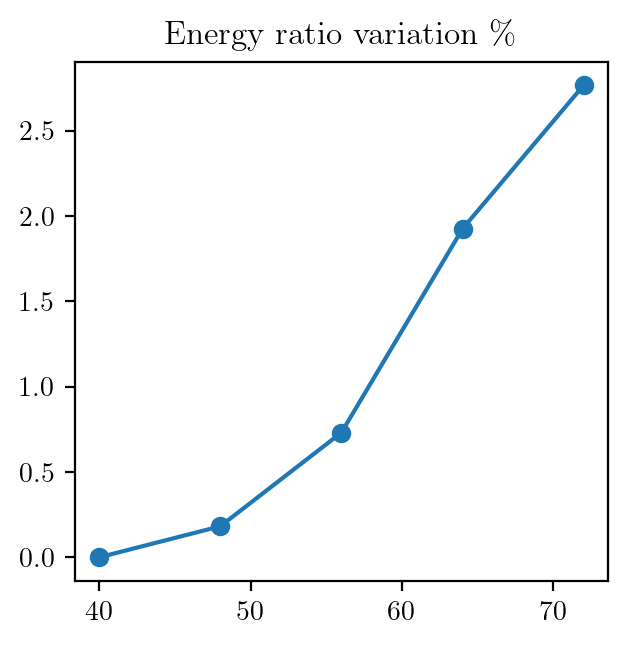

In [19]:
colors = ['black', 'red',  'blue']

f_ex_skyrmion = (Ftot - F_uniform)[:-1]
f_ex_vortex = (F_vortex - F_uniform)[:-1]

print(f_ex_vortex)
print(f_ex_skyrmion)


plt.figure(dpi=200)
plt.plot(data.p1[:-1],100*(f_ex_vortex/f_ex_vortex[0]-1), marker='o')
plt.title("Vortex energy variation $\%$")

plt.figure(dpi=200)
plt.plot(data.p1[:-1],100*(f_ex_skyrmion/f_ex_skyrmion[0]-1), marker='o')
plt.title("Skyrmion energy variation $\%$")

plt.figure(dpi=200)
plt.plot(data.p1[:-1],100*(f_ex_skyrmion/f_ex_vortex * f_ex_vortex[0]/f_ex_skyrmion[0]-1), marker='o')
plt.title("Energy ratio variation $\%$")


In [ ]:
F_mats = np.array([[3.31090454, 3.04043155, 2.80319713, 2.60069334, 2.4279758 ,
        2.27915556, 2.14916776],
       [3.40007627, 3.07328803, 2.81388297, 2.60350139, 2.42822964,
        2.27868511, 2.1485539 ],
       [3.41791181, 3.07716588, 2.81463147, 2.60361576, 2.42822974,
        2.27866945, 2.14853854]])

q_mats = np.array([0.144444, 0.188888, 0.233333, 0.277778, 0.322222, 0.366667,
       0.411111])

In [ ]:

for i in range(len(size)):
    plt.figure(dpi=100)
    plt.plot(data.p1, Ftot[i], marker='o', color=colors[i], label=fr"$N={size[i]}$")
    plt.plot(q_mats, F_mats[i], marker='x', color=colors[i], label=fr"$N={size[i]}-Mats$")
    plt.legend(loc='best')

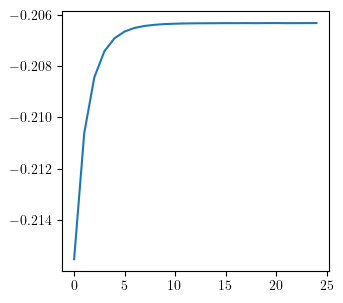

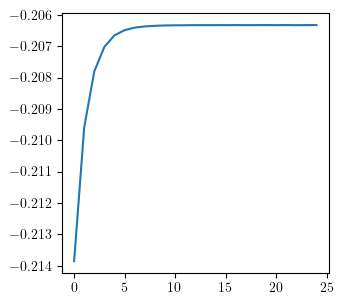

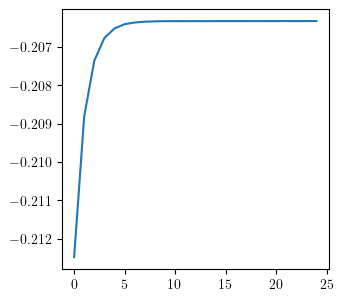

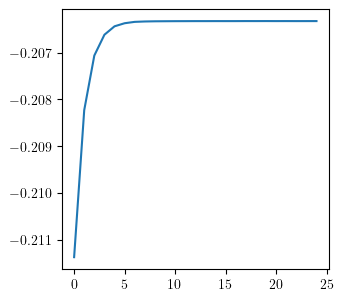

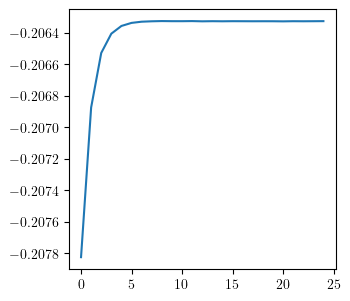

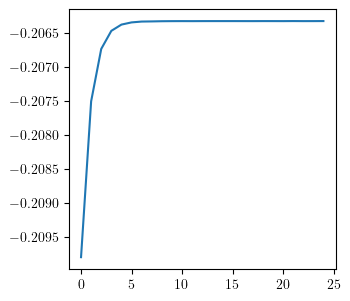

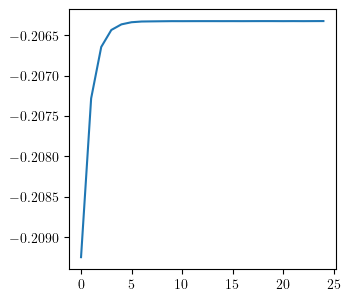

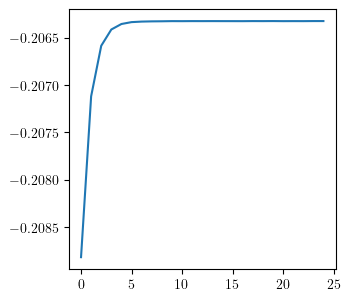

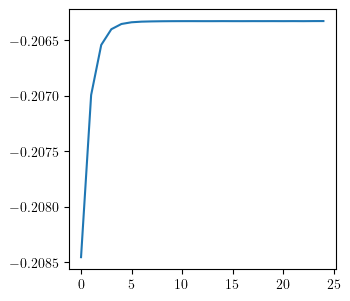

In [13]:
xi = []

for i in range(len(data.p1)):
    data.importSimData(i)
    idx = np.argmin(np.absolute(data.D_1))
    y,x = np.unravel_index(idx, np.absolute(data.D_1).shape)
    
    D_xs = np.absolute(data.D_1)[y,x+5:-10]
    D_xs_log = np.log(D_xs)
    x = np.arange(0, len(D_xs_log))
   
    # D_xs_log = np.where(D_xs_log<-5, D_xs_log, np.nan)
    # D_xs_log = np.where(D_xs_log>-10, D_xs_log, np.nan)
    # D_xs_log = D_xs_log[~np.isnan(D_xs_log)]

    
   
    plt.figure(dpi=100)
    plt.plot(x, D_xs_log)
    # plt.plot(x, params[0]*x + params[1])

    # params = np.polyfit(x, D_xs_log , 1)
    # xi.append(-1/params[0])